In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el archivo Excel
df = pd.read_excel("../data/test.xlsx")
df.head()

,Preguntas,Respuestas,time,emotion
0,Hoy me siento muy estresado porque mañana teng...,Entiendo cómo te sientes. El estrés antes de u...,6.643178,sadness
1,"Saqué buena nota en la expo, valió la pena tra...",¡Qué bien! 🎉 Me alegra mucho que hayas sacado ...,3.887419,joy
2,"No dormí bien anoche por estar estudiando, me ...",Lamento que no hayas podido descansar bien. Es...,4.717958,sadness
3,Hoy simplemente me siento buena energía.,¡Qué bueno escuchar eso! 😄 La buena energía es...,3.961087,joy
4,Tengo miedo de no pasar la materia este semestre.,"Es normal sentir miedo de no pasar, pero recue...",4.064906,fear


In [3]:
# Información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Preguntas   20 non-null     object 
 1   Respuestas  20 non-null     object 
 2   time        20 non-null     float64
 3   emotion     20 non-null     object 
dtypes: float64(1), object(3)
memory usage: 772.0+ bytes


In [4]:
# Descripción estadística de la columna 'time'
df['time'].describe()

count    20.000000
mean      4.570493
std       0.803246
min       3.687808
25%       3.966129
50%       4.379775
75%       4.852837
max       6.643178
Name: time, dtype: float64

In [5]:
# Calcular estadísticas de tiempo
tiempo_promedio = df['time'].mean()
tiempo_maximo = df['time'].max()
tiempo_minimo = df['time'].min()

print(f"Tiempo Promedio: {tiempo_promedio:.2f} segundos")
print(f"Tiempo Máximo: {tiempo_maximo:.2f} segundos")
print(f"Tiempo Mínimo: {tiempo_minimo:.2f} segundos")

Tiempo Promedio: 4.57 segundos
Tiempo Máximo: 6.64 segundos
Tiempo Mínimo: 3.69 segundos


In [6]:
# Crear DataFrame con las estadísticas
estadisticas = {
    'Métrica': ['Promedio', 'Máximo', 'Mínimo'],
    'Tiempo (s)': [tiempo_promedio, tiempo_maximo, tiempo_minimo]
}
stats_df = pd.DataFrame(estadisticas)
stats_df

,Métrica,Tiempo (s)
0,Promedio,4.570493
1,Máximo,6.643178
2,Mínimo,3.687808


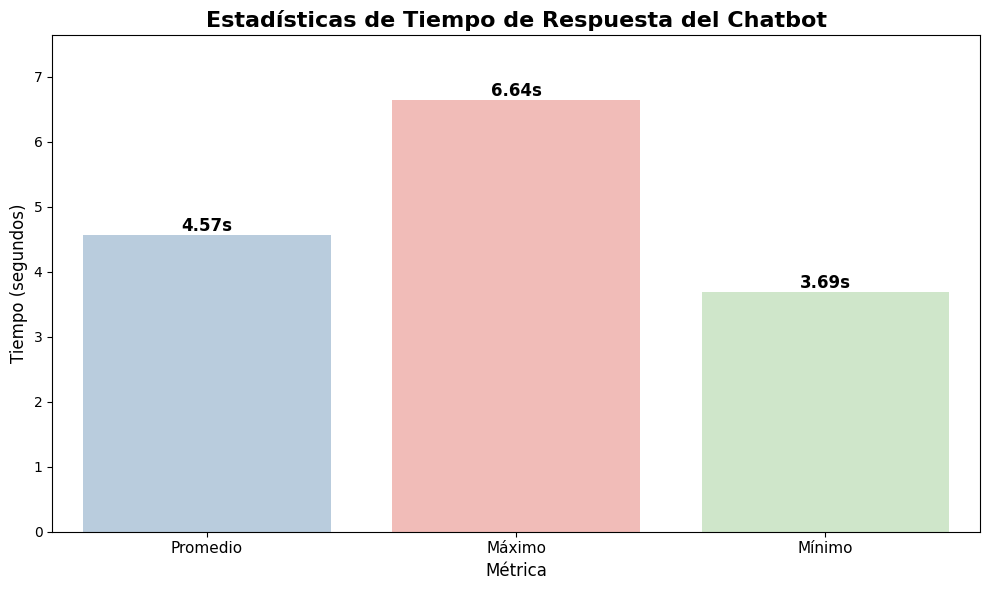

In [7]:
# Gráfico de barras con Promedio, Máximo y Mínimo
plt.figure(figsize=(10, 6))

colores = ['#B3CDE3', '#FBB4AE', '#CCEBC5']  # Paleta pastel
ax = sns.barplot(data=stats_df, x='Métrica', y='Tiempo (s)', hue='Métrica', palette=colores, legend=False)

# Agregar etiquetas encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.2f}s",
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold',
        color='black'
    )

plt.title('Estadísticas de Tiempo de Respuesta del Chatbot', fontsize=16, fontweight='bold')
plt.ylabel('Tiempo (segundos)', fontsize=12)
plt.xlabel('Métrica', fontsize=12)
plt.ylim(0, tiempo_maximo * 1.15)  # Dejar espacio para las etiquetas
plt.xticks(fontsize=11)
plt.yticks(fontsize=10)
plt.tight_layout()

# Guardar la gráfica
plt.savefig('../plots/tiempo_respuesta_estadisticas.png', dpi=300, bbox_inches='tight')
plt.show()

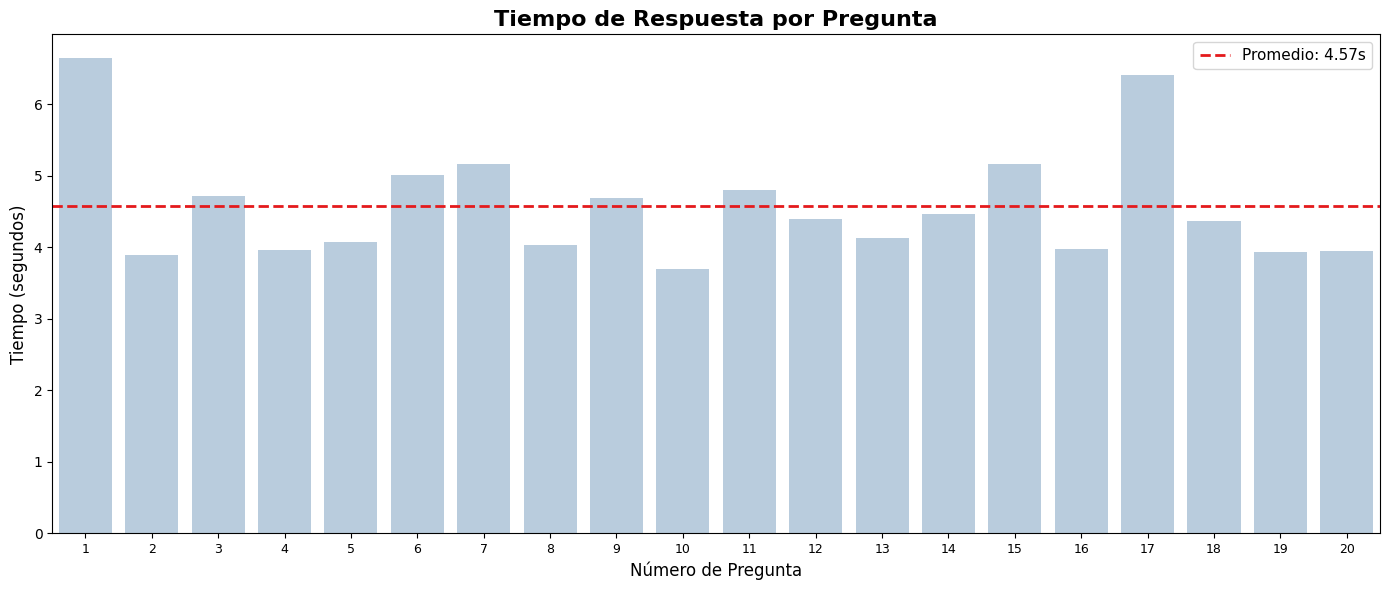

In [8]:
# Gráfico de tiempos por cada pregunta
plt.figure(figsize=(14, 6))

# Crear índice de preguntas
df['Pregunta_Num'] = range(1, len(df) + 1)

ax = sns.barplot(data=df, x='Pregunta_Num', y='time', color='#B3CDE3')

# Línea horizontal para el promedio
plt.axhline(y=tiempo_promedio, color='#E41A1C', linestyle='--', linewidth=2, label=f'Promedio: {tiempo_promedio:.2f}s')

plt.title('Tiempo de Respuesta por Pregunta', fontsize=16, fontweight='bold')
plt.ylabel('Tiempo (segundos)', fontsize=12)
plt.xlabel('Número de Pregunta', fontsize=12)
plt.legend(fontsize=11)
plt.xticks(fontsize=9)
plt.yticks(fontsize=10)
plt.tight_layout()

# Guardar la gráfica
plt.savefig('../plots/tiempo_por_pregunta.png', dpi=300, bbox_inches='tight')
plt.show()

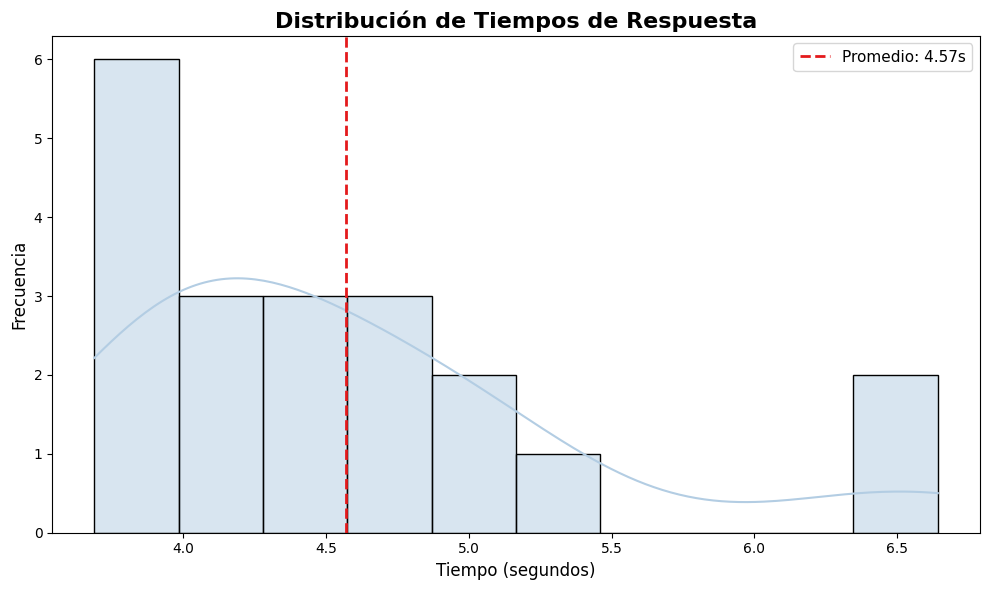

In [9]:
# Distribución de tiempos (histograma)
plt.figure(figsize=(10, 6))

sns.histplot(df['time'], bins=10, kde=True, color='#B3CDE3')

plt.axvline(x=tiempo_promedio, color='#E41A1C', linestyle='--', linewidth=2, label=f'Promedio: {tiempo_promedio:.2f}s')

plt.title('Distribución de Tiempos de Respuesta', fontsize=16, fontweight='bold')
plt.xlabel('Tiempo (segundos)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=11)
plt.tight_layout()

# Guardar la gráfica
plt.savefig('../plots/distribucion_tiempos.png', dpi=300, bbox_inches='tight')
plt.show()